In [1]:
import torch
from transformers import BertModel , BertForSequenceClassification, AutoModelForSequenceClassification                                                                                 
from data_loader_category import load_split_data
from torch import nn
from torch.optim import SGD
from model import BertModelClassification, CNN, ModelMixBert
from train_model import Train
from torchvision import models

from transformers.models.roberta.modeling_roberta import (
    RobertaClassificationHead,
    RobertaConfig,
)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

In [2]:

BATCH_SIZE = 128
LEARN_RATE = 0.001
EMBEDDING_DIM = 128

In [3]:
trainloader, testloader, model_dataset = load_split_data(datadir='./final.csv', batch_size=BATCH_SIZE, test_size=0.3, data_augmentation=True, BERT = True)
tematicas_name = model_dataset.get_tematicas_name()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\groso\Desktop\Memes\Meme\lib\site-packages\transformers\tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


cantidad datos 1442


In [4]:
config_class = RobertaConfig
config = config_class.from_pretrained("roberta-base", num_labels=17)

model_class = AutoModelForSequenceClassification.from_pretrained("roberta-base")
model_class.to(device)
model_class.classifier = RobertaClassificationHead(config)

# for parameter in model_class.parameters():
#     parameter.requires_grad = True


# model = BertModel.from_pretrained('bert-base-uncased')
# for parameter in model.parameters():
#     parameter.requires_grad = True

#model_bert = BertModelClassification(model_class, 17)

# model_ft = models.resnet152(pretrained=True)
# for parameter in model_ft.parameters():
#     parameter.requires_grad = True

# num_ftrs = model_ft.fc.in_features
# model_ft.fc = nn.Linear(num_ftrs, 128)
# model_ft = model_ft.to(device)


# model2 = CNN(128)
# model_mix = ModelMixBert(model_ft, model_bert, 256, 17)


criterion = nn.CrossEntropyLoss()


optimizer = SGD(model_class.parameters(), lr=LEARN_RATE, momentum=0.9)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

==== Iniciando entrenamiento ==== 

Los parametros a usar son
              model: RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              

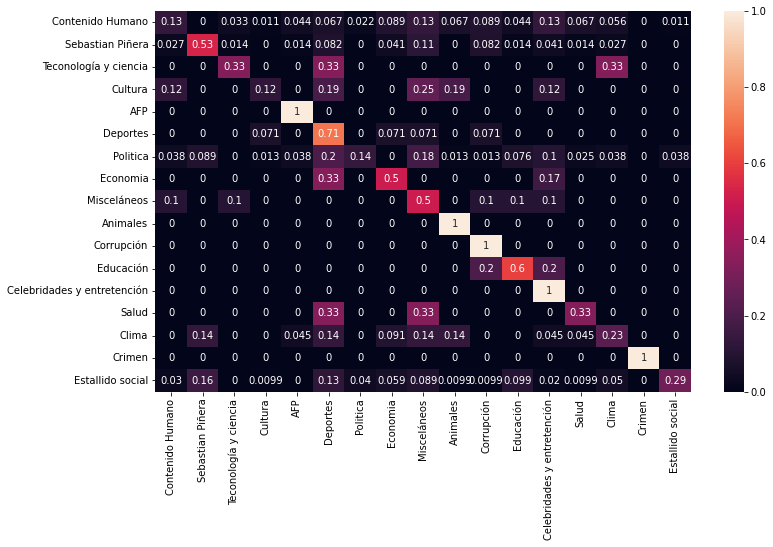

Recall
0.5545396609471358
Precision
0.3202125725750168
F1 Score
0.2850327555178938
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.52      0.13      0.21        90
           Sebastian Piñera       0.60      0.53      0.57        73
      Teconología y ciencia       0.17      0.33      0.22         3
                    Cultura       0.33      0.12      0.18        16
                        AFP       0.25      1.00      0.40         3
                   Deportes       0.16      0.71      0.27        14
                   Politica       0.65      0.14      0.23        79
                   Economia       0.13      0.50      0.21         6
                Misceláneos       0.09      0.50      0.15        10
                   Animales       0.07      1.00      0.12         1
                 Corrupción       0.10      1.00      0.17         2
                  Educación       0.12      0.60      0.20       

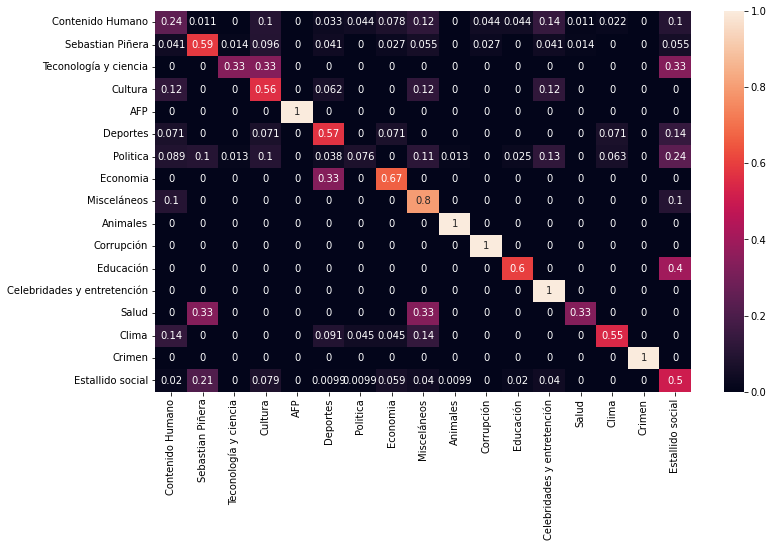

Recall
0.6368883442758482
Precision
0.430019514731132
F1 Score
0.4444314261601323
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.54      0.24      0.34        90
           Sebastian Piñera       0.58      0.59      0.59        73
      Teconología y ciencia       0.33      0.33      0.33         3
                    Cultura       0.21      0.56      0.31        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.35      0.57      0.43        14
                   Politica       0.50      0.08      0.13        79
                   Economia       0.19      0.67      0.30         6
                Misceláneos       0.19      0.80      0.31        10
                   Animales       0.33      1.00      0.50         1
                 Corrupción       0.25      1.00      0.40         2
                  Educación       0.27      0.60      0.37        

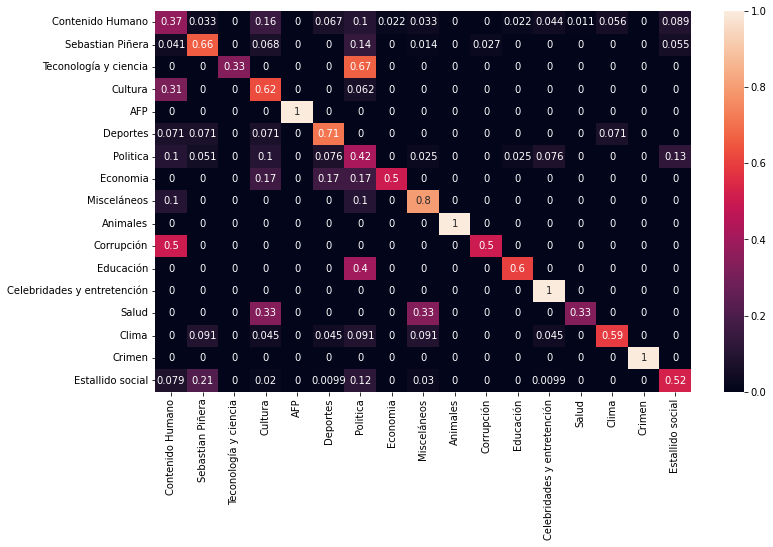

Recall
0.6449139046669616
Precision
0.590461586382862
F1 Score
0.5719294108750707
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.55      0.37      0.44        90
           Sebastian Piñera       0.61      0.66      0.63        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.23      0.62      0.34        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.40      0.71      0.51        14
                   Politica       0.45      0.42      0.43        79
                   Economia       0.60      0.50      0.55         6
                Misceláneos       0.40      0.80      0.53        10
                   Animales       1.00      1.00      1.00         1
                 Corrupción       0.33      0.50      0.40         2
                  Educación       0.43      0.60      0.50        

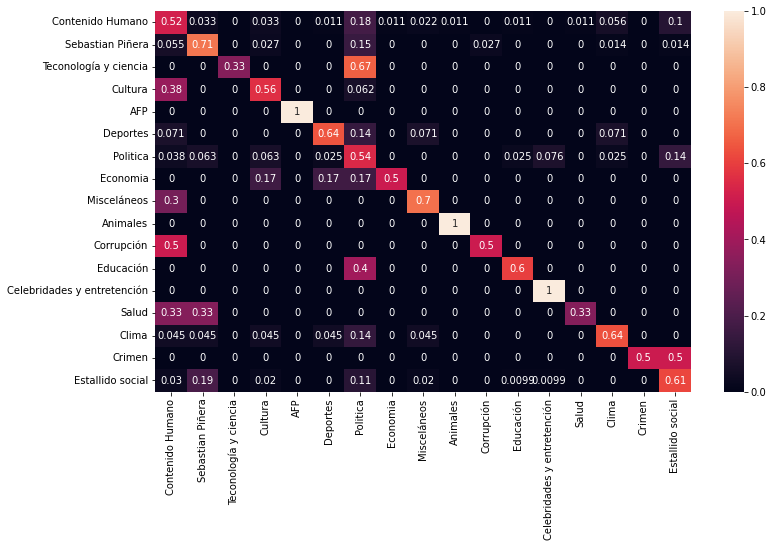

Recall
0.629476683461172
Precision
0.6137844757623104
F1 Score
0.5804883587037982
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.67      0.52      0.59        90
           Sebastian Piñera       0.64      0.71      0.68        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.39      0.56      0.46        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.64      0.64      0.64        14
                   Politica       0.47      0.54      0.50        79
                   Economia       0.75      0.50      0.60         6
                Misceláneos       0.54      0.70      0.61        10
                   Animales       0.50      1.00      0.67         1
                 Corrupción       0.33      0.50      0.40         2
                  Educación       0.43      0.60      0.50        

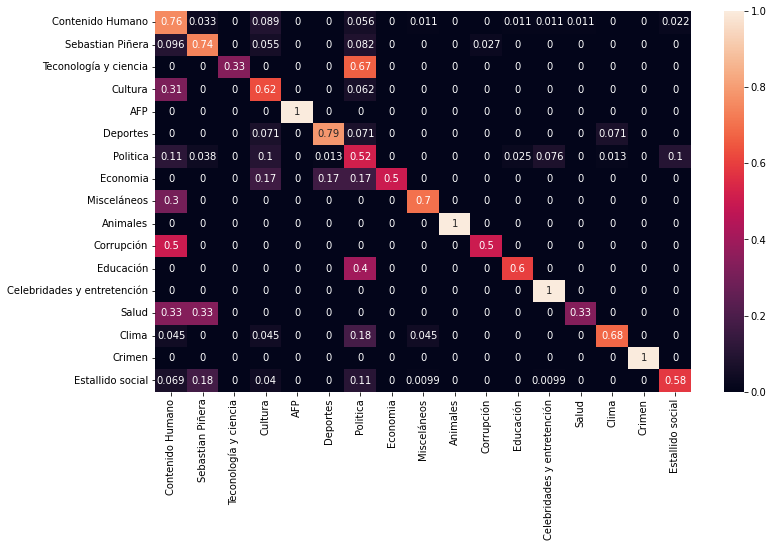

Recall
0.6857427338097463
Precision
0.7053792870129544
F1 Score
0.6562225663921234
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.67      0.76      0.71        90
           Sebastian Piñera       0.68      0.74      0.71        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.27      0.62      0.38        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.85      0.79      0.81        14
                   Politica       0.55      0.52      0.54        79
                   Economia       1.00      0.50      0.67         6
                Misceláneos       0.70      0.70      0.70        10
                   Animales       1.00      1.00      1.00         1
                 Corrupción       0.33      0.50      0.40         2
                  Educación       0.50      0.60      0.55       

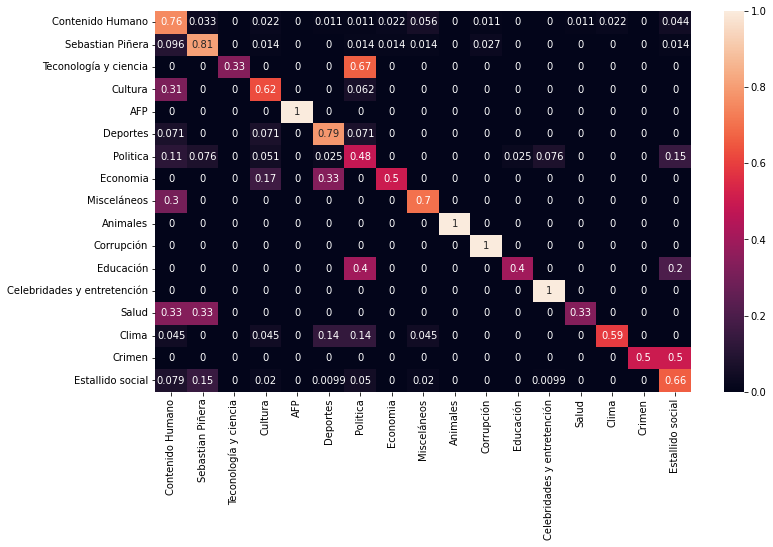

Recall
0.6750849277523118
Precision
0.6633107612775377
F1 Score
0.6238221518236493
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.66      0.76      0.70        90
           Sebastian Piñera       0.70      0.81      0.75        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.45      0.62      0.53        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.55      0.79      0.65        14
                   Politica       0.70      0.48      0.57        79
                   Economia       0.50      0.50      0.50         6
                Misceláneos       0.44      0.70      0.54        10
                   Animales       1.00      1.00      1.00         1
                 Corrupción       0.40      1.00      0.57         2
                  Educación       0.50      0.40      0.44       

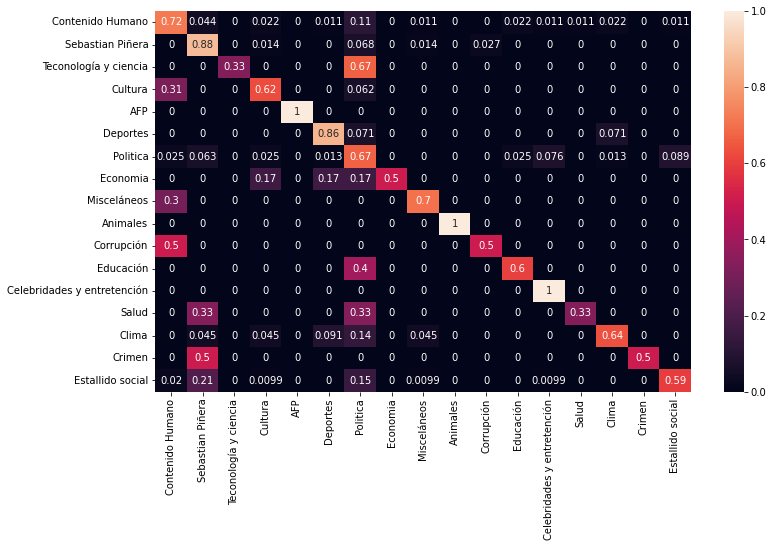

Recall
0.6734737172383805
Precision
0.7103996447482203
F1 Score
0.6497228712189178
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.83      0.72      0.77        90
           Sebastian Piñera       0.66      0.88      0.75        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.56      0.62      0.59        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.71      0.86      0.77        14
                   Politica       0.56      0.67      0.61        79
                   Economia       1.00      0.50      0.67         6
                Misceláneos       0.64      0.70      0.67        10
                   Animales       1.00      1.00      1.00         1
                 Corrupción       0.33      0.50      0.40         2
                  Educación       0.43      0.60      0.50       

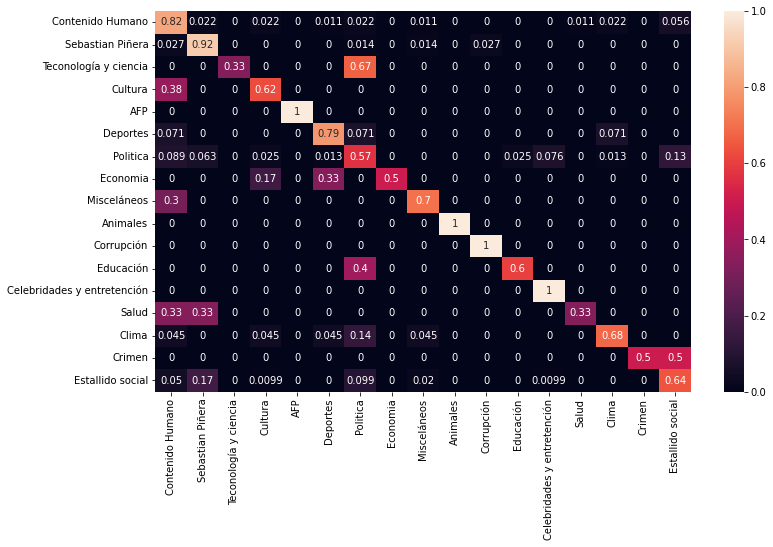

Recall
0.7066125991293906
Precision
0.730783101239388
F1 Score
0.6763026592039707
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.74      0.82      0.78        90
           Sebastian Piñera       0.73      0.92      0.81        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.59      0.62      0.61        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.69      0.79      0.73        14
                   Politica       0.68      0.57      0.62        79
                   Economia       1.00      0.50      0.67         6
                Misceláneos       0.58      0.70      0.64        10
                   Animales       1.00      1.00      1.00         1
                 Corrupción       0.50      1.00      0.67         2
                  Educación       0.60      0.60      0.60        

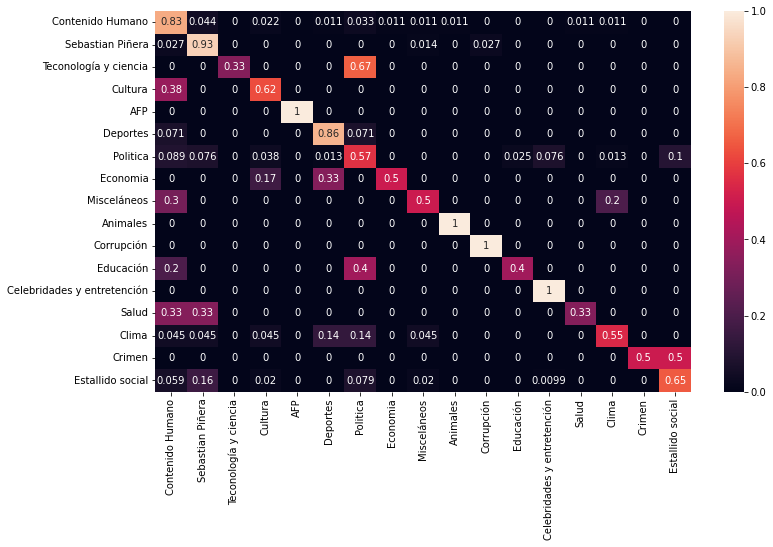

Recall
0.6813052853889224
Precision
0.6705723901296169
F1 Score
0.6293922049335688
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.73      0.83      0.78        90
           Sebastian Piñera       0.71      0.93      0.80        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.53      0.62      0.57        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.63      0.86      0.73        14
                   Politica       0.70      0.57      0.63        79
                   Economia       0.75      0.50      0.60         6
                Misceláneos       0.50      0.50      0.50        10
                   Animales       0.50      1.00      0.67         1
                 Corrupción       0.50      1.00      0.67         2
                  Educación       0.50      0.40      0.44       

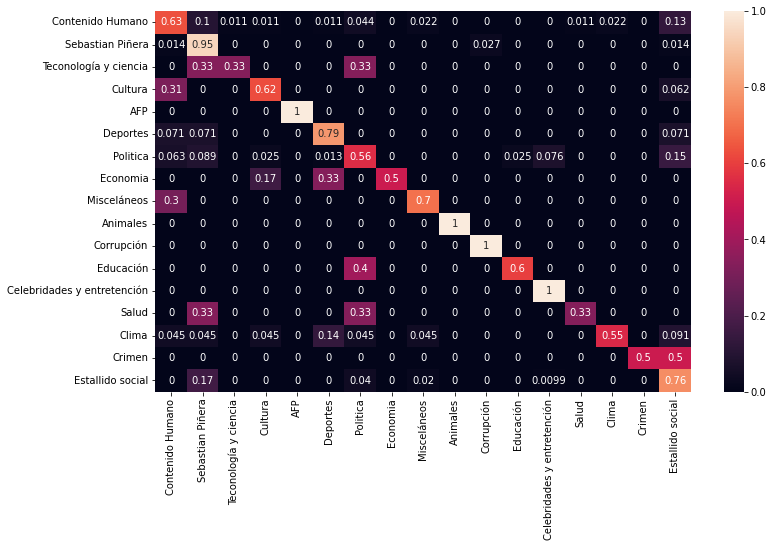

Recall
0.6953360337388885
Precision
0.7037527939586192
F1 Score
0.6621828011553617
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.78      0.63      0.70        90
           Sebastian Piñera       0.65      0.95      0.77        73
      Teconología y ciencia       0.50      0.33      0.40         3
                    Cultura       0.67      0.62      0.65        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.61      0.79      0.69        14
                   Politica       0.77      0.56      0.65        79
                   Economia       1.00      0.50      0.67         6
                Misceláneos       0.58      0.70      0.64        10
                   Animales       1.00      1.00      1.00         1
                 Corrupción       0.50      1.00      0.67         2
                  Educación       0.60      0.60      0.60       

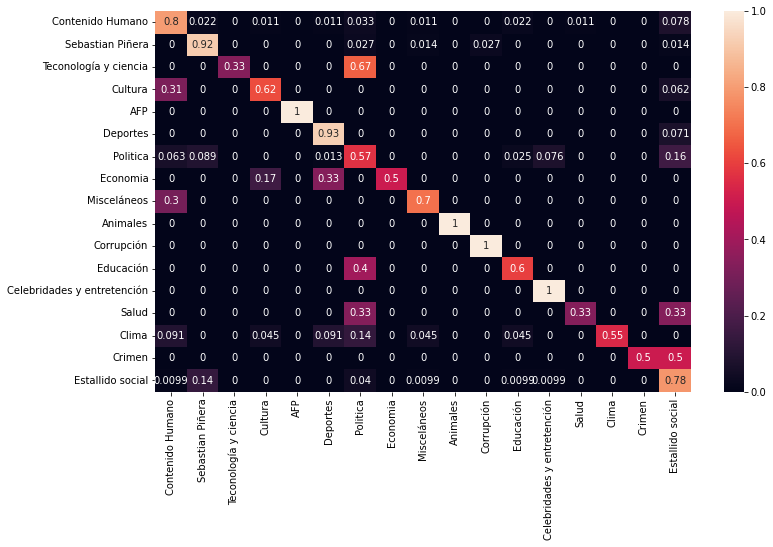

Recall
0.713841137109239
Precision
0.7466710933129589
F1 Score
0.6813173532577184
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.82      0.80      0.81        90
           Sebastian Piñera       0.74      0.92      0.82        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.77      0.62      0.69        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.68      0.93      0.79        14
                   Politica       0.73      0.57      0.64        79
                   Economia       1.00      0.50      0.67         6
                Misceláneos       0.64      0.70      0.67        10
                   Animales       1.00      1.00      1.00         1
                 Corrupción       0.50      1.00      0.67         2
                  Educación       0.33      0.60      0.43        

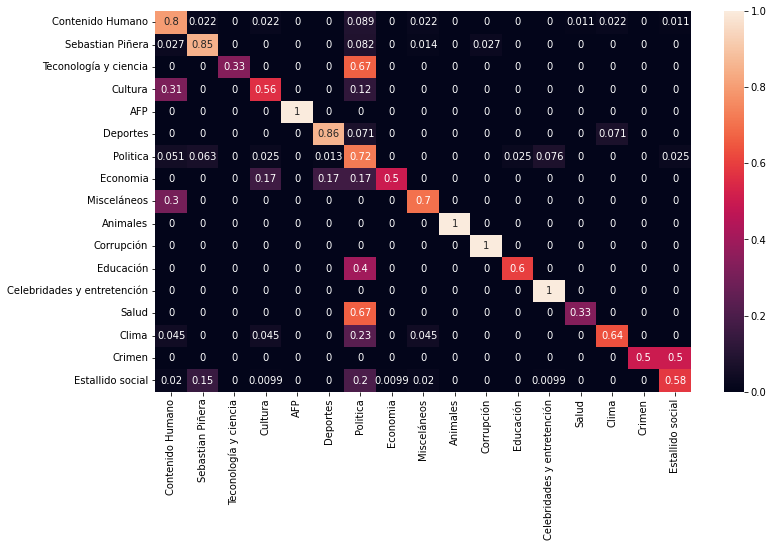

Recall
0.7045685665793922
Precision
0.7279519892527087
F1 Score
0.674897854500813
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.81      0.80      0.80        90
           Sebastian Piñera       0.74      0.85      0.79        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.56      0.56      0.56        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.86      0.86      0.86        14
                   Politica       0.54      0.72      0.62        79
                   Economia       0.75      0.50      0.60         6
                Misceláneos       0.54      0.70      0.61        10
                   Animales       1.00      1.00      1.00         1
                 Corrupción       0.50      1.00      0.67         2
                  Educación       0.60      0.60      0.60        

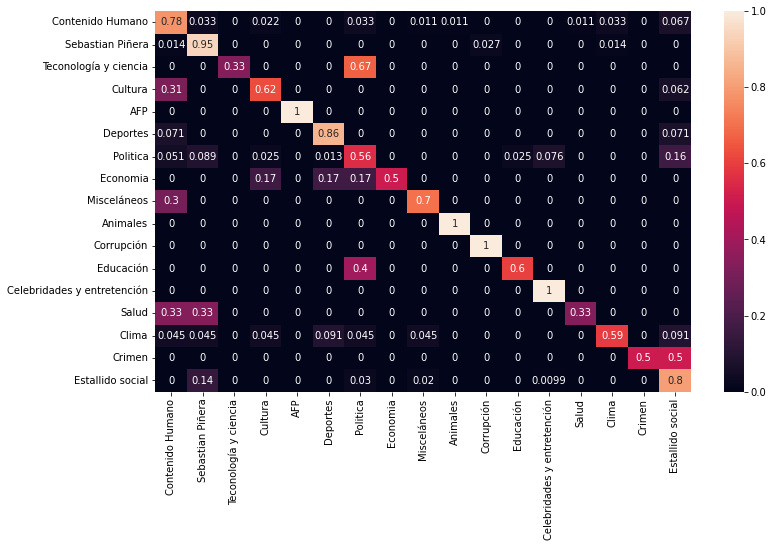

Recall
0.7130378879579238
Precision
0.7173943456427904
F1 Score
0.6672811234918602
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.81      0.78      0.80        90
           Sebastian Piñera       0.73      0.95      0.82        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.62      0.62      0.62        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.75      0.86      0.80        14
                   Politica       0.79      0.56      0.65        79
                   Economia       1.00      0.50      0.67         6
                Misceláneos       0.64      0.70      0.67        10
                   Animales       0.50      1.00      0.67         1
                 Corrupción       0.50      1.00      0.67         2
                  Educación       0.60      0.60      0.60       

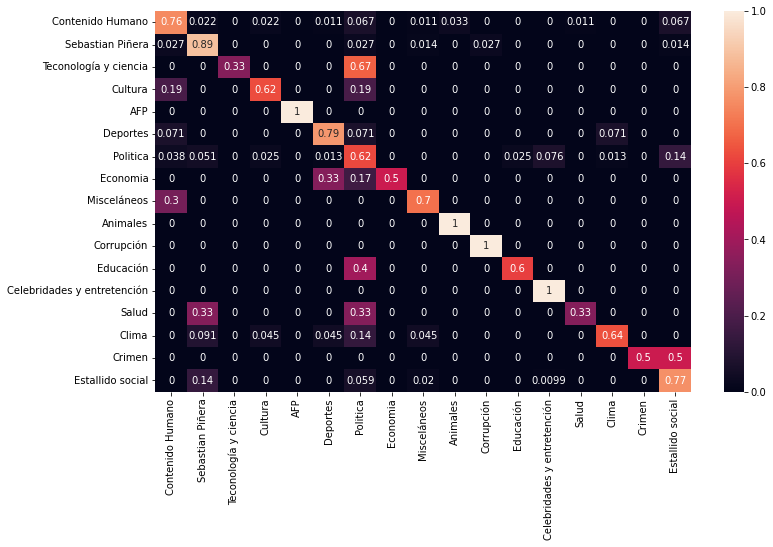

Recall
0.7089553820872935
Precision
0.7013070081943562
F1 Score
0.6495839410272386
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.85      0.76      0.80        90
           Sebastian Piñera       0.74      0.89      0.81        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.67      0.62      0.65        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.69      0.79      0.73        14
                   Politica       0.64      0.62      0.63        79
                   Economia       1.00      0.50      0.67         6
                Misceláneos       0.58      0.70      0.64        10
                   Animales       0.25      1.00      0.40         1
                 Corrupción       0.50      1.00      0.67         2
                  Educación       0.60      0.60      0.60       

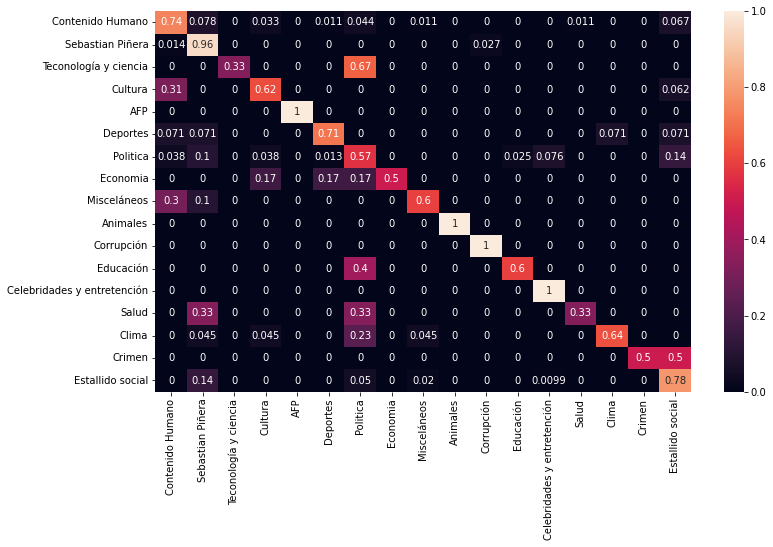

Recall
0.699850767196226
Precision
0.7463377071244004
F1 Score
0.6792975879308057
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.84      0.74      0.79        90
           Sebastian Piñera       0.68      0.96      0.80        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.56      0.62      0.59        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.77      0.71      0.74        14
                   Politica       0.69      0.57      0.62        79
                   Economia       1.00      0.50      0.67         6
                Misceláneos       0.60      0.60      0.60        10
                   Animales       1.00      1.00      1.00         1
                 Corrupción       0.50      1.00      0.67         2
                  Educación       0.60      0.60      0.60        

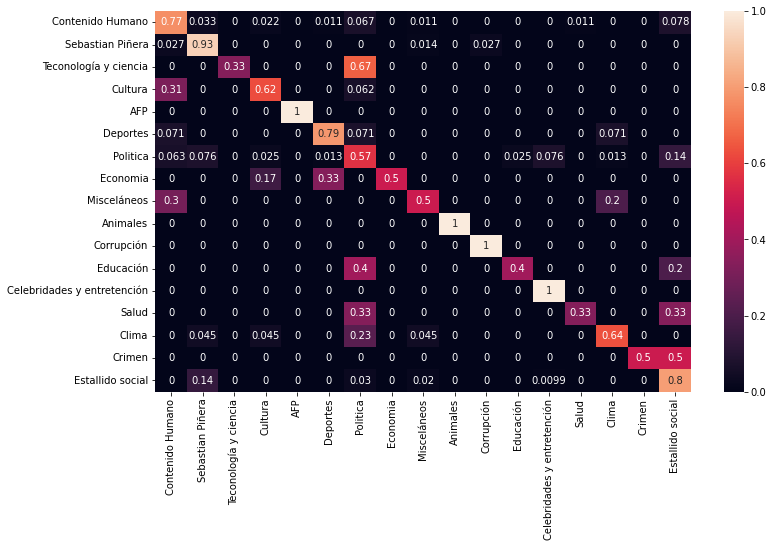

Recall
0.6872657974065107
Precision
0.7285390766397236
F1 Score
0.6660726213160288
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.81      0.77      0.79        90
           Sebastian Piñera       0.74      0.93      0.82        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.62      0.62      0.62        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.73      0.79      0.76        14
                   Politica       0.68      0.57      0.62        79
                   Economia       1.00      0.50      0.67         6
                Misceláneos       0.50      0.50      0.50        10
                   Animales       1.00      1.00      1.00         1
                 Corrupción       0.50      1.00      0.67         2
                  Educación       0.50      0.40      0.44       

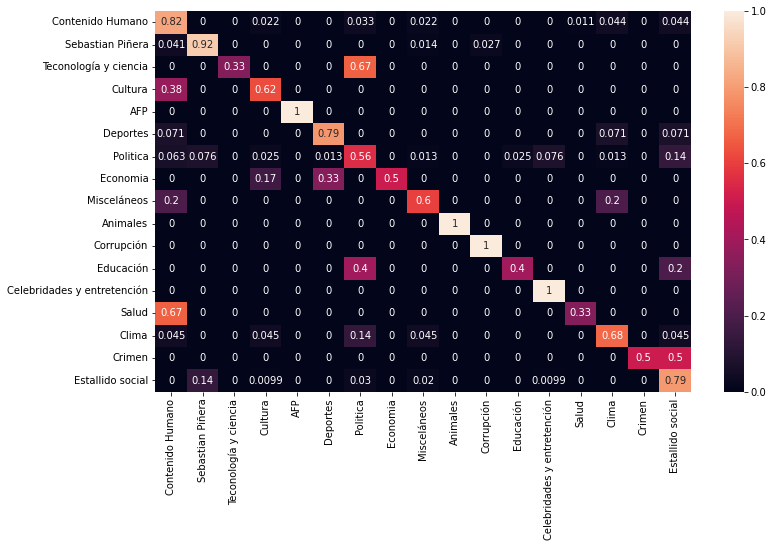

Recall
0.6969571064021581
Precision
0.7263084584917784
F1 Score
0.6692451850925598
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.79      0.82      0.80        90
           Sebastian Piñera       0.77      0.92      0.84        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.59      0.62      0.61        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.79      0.79      0.79        14
                   Politica       0.77      0.56      0.65        79
                   Economia       1.00      0.50      0.67         6
                Misceláneos       0.46      0.60      0.52        10
                   Animales       1.00      1.00      1.00         1
                 Corrupción       0.50      1.00      0.67         2
                  Educación       0.50      0.40      0.44       

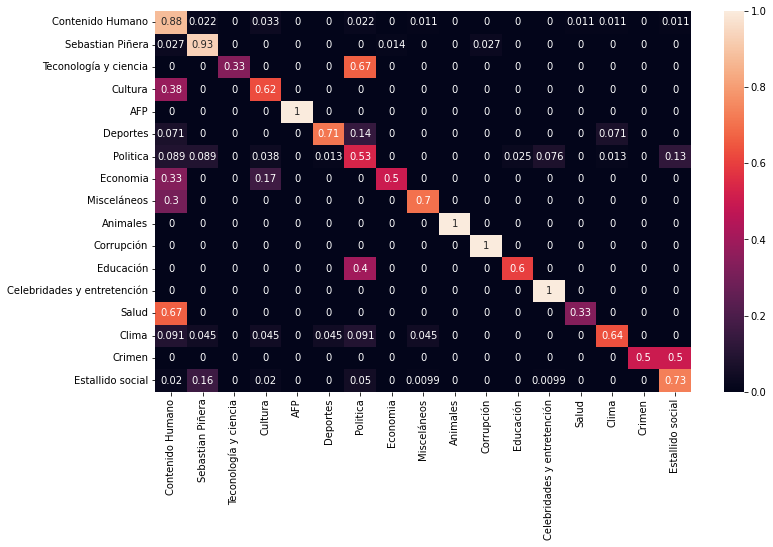

Recall
0.7068187930209323
Precision
0.7350046742970331
F1 Score
0.6805464326623688
Classification report:
                             precision    recall  f1-score   support

           Contenido Humano       0.75      0.88      0.81        90
           Sebastian Piñera       0.72      0.93      0.81        73
      Teconología y ciencia       1.00      0.33      0.50         3
                    Cultura       0.50      0.62      0.56        16
                        AFP       1.00      1.00      1.00         3
                   Deportes       0.83      0.71      0.77        14
                   Politica       0.74      0.53      0.62        79
                   Economia       0.75      0.50      0.60         6
                Misceláneos       0.70      0.70      0.70        10
                   Animales       1.00      1.00      1.00         1
                 Corrupción       0.50      1.00      0.67         2
                  Educación       0.60      0.60      0.60       

KeyboardInterrupt: 

In [5]:
experiment = Train(model_class, optimizer, criterion,trainloader, testloader, show_matrix=True, epochs=1000, prints_every=100
, device=device, classes=tematicas_name, include_text=True, show_metrics=True)
experiment.train_bert(include_image=False)